# **Project Information**
# **Title: Data Exploration with Python**

## 1.   Student Names: Abhijeet & Prachi Lakra
## 2.   Roll Numbers: 055002 & 055029

**ABOUT THE DATASET**
The dataset represents a comprehensive record of 15,000 import and export transactions across various countries. Each entry is uniquely identified by a `Transaction_ID` and contains key details such as the country of origin or destination, the product category, and whether the transaction is an import or export. The dataset also includes critical information such as the quantity and value of goods, the date of the transaction, and the customs code. Additional columns like `Port`, `Weight`, and `Shipping_Method` provide logistical insights. Furthermore, it tracks business details, such as the supplier and customer involved, along with `Payment_Terms`, offering a clear picture of the financial and operational dynamics of each trade. This dataset is valuable for analyzing trade patterns, identifying product trends, and understanding the economic relationships between different countries and industries over time. It can be used for market research, logistical planning, or economic analysis.

# Description of Data
● Data Source & Size:
1. Source: [Kaggle Dataset]("https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000")
2. Size: 2.56MB

● Data Type: Cross-sectional | Time-series | Panel <br>
● Data Dimension: Number of Variables | Number of Observations <br>
● Data Variable Type: Text | Number {Integer | Decimal} <br>
● Data Variable Category: Index | Categorical {Nominal | Ordinal} | Non-Categorical <br>

In [34]:
import pandas as pd
import numpy as np

# Load the dataset
total_df = pd.read_csv(r"C:\Users\ABHIJEET\OneDrive\Fore\Trimester 1\Python\Project\Imports_Exports_Dataset.csv")

df = total_df.sample(n = 2001, random_state = 55002)
df_sampled = df
data = df

In [35]:
# Preparing the required information
data_source = 'Kaggle, "https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000"'
data_size = data.memory_usage().sum() / (1024 * 1024)  # Size in MB
data_type = "Cross-sectional"  # Since it is capturing different transactions without clear time-dependent relationships for the same entity

# Data dimensions
number_of_variables = data.shape[1]
number_of_observations = data.shape[0]

# Data Variable Types
variable_types = data.dtypes
variable_type_summary = variable_types.apply(lambda x: 'Integer' if x == 'int64' else 'Decimal' if x == 'float64' else 'Text')

# Data Variable Category
categorical_vars = data.select_dtypes(include=['object']).columns.tolist()
non_categorical_vars = data.select_dtypes(exclude=['object']).columns.tolist()

non_categorical_vars = ['Quantity', 'Value', 'Weight']
categorical_vars = ['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Date',
                'Category', 'Port', 'Shipping_Method', 'Supplier', 'Customer', 'Payment_Terms']

# Reformatting data_description to be displayed properly as a DataFrame
data_description_df = pd.DataFrame({
    "Attribute": ["Data Source", "Data Size (MB)", "Data Type", "Number of Variables", "Number of Observations", 
                  "Variable Types", "Categorical Variables Nominal", "Categorical Variables Ordinal", "Non-Categorical Variables Nominal"],
    "Details": [data_source, data_size, data_type, number_of_variables, number_of_observations, 
                variable_type_summary.to_dict(), categorical_vars, '', non_categorical_vars]
})
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000) 
# Displaying the reformatted DataFrame to the user
data_description_df

,Attribute,Details
0,Data Source,"Kaggle, ""https://www.kaggle.com/datasets/chakilamvishwas/imports-exports-15000"""
1,Data Size (MB),0.259529
2,Data Type,Cross-sectional
3,Number of Variables,16
4,Number of Observations,2001
5,Variable Types,"{'Transaction_ID': 'Text', 'Country': 'Text', 'Product': 'Text', 'Import_Export': 'Text', 'Quantity': 'Integer', 'Value': 'Decimal', 'Date': 'Text', 'Category': 'Text', 'Port': 'Text', 'Customs_Code': 'Integer', 'Weight': 'Decimal', 'Shipping_Method': 'Text', 'Supplier': 'Text', 'Customer': 'Text', 'Invoice_Number': 'Integer', 'Payment_Terms': 'Text'}"
6,Categorical Variables Nominal,"[Transaction_ID, Country, Product, Import_Export, Date, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms]"
7,Categorical Variables Ordinal,
8,Non-Categorical Variables Nominal,"[Quantity, Value, Weight]"


1.Non-Categorical Varibales Quantity Value & Weight<br>
2.Categorical Variable Nominal type: Transaction_ID, Country, Product, Import_Export, Date, Category, Port, Shipping_Method, Supplier, Customer, Payment_Terms<br>
3.Categorical Variable Ordinal type Null

In [37]:
df.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
10200,9e0514c5-6614-49da-86ec-2078477cfac4,Malta,subject,Export,1502,1839.60,10-01-2022,Electronics,Lake Sabrinafort,699459,1389.59,Land,Hart Group,Joann Campos,81130044,Net 30
5670,5bc2bcc7-0486-4b09-9c36-bdce2a1a3b21,Ethiopia,course,Export,8996,7345.69,27-05-2022,Furniture,South Ryan,373935,4261.19,Sea,"Rogers, Mccarty and Griffith",Brian Black,18100184,Cash on Delivery
4482,5b9cf89f-a85b-4692-b24c-863bb6513595,Russian Federation,course,Export,5388,3963.55,02-09-2022,Clothing,Henryview,568552,3076.02,Sea,"Vasquez, Little and Villanueva",Melissa Henry,30029769,Cash on Delivery
4739,18028380-3362-47c5-a717-d0f28169460f,Bahamas,level,Import,1292,3940.89,13-05-2021,Electronics,Dodsonmouth,189313,4685.04,Land,"Christian, Knox and Thomas",Kayla Rasmussen,28327887,Net 60
1631,ca1e5dac-1701-4bcc-be9e-5d82bcbbf1f9,Saint Martin,radio,Import,4219,5116.03,16-11-2023,Electronics,East Jillside,650282,4151.79,Air,Peterson-Molina,Rachel Gates,44444586,Net 60


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2001 entries, 10200 to 8178
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   2001 non-null   object 
 1   Country          2001 non-null   object 
 2   Product          2001 non-null   object 
 3   Import_Export    2001 non-null   object 
 4   Quantity         2001 non-null   int64  
 5   Value            2001 non-null   float64
 6   Date             2001 non-null   object 
 7   Category         2001 non-null   object 
 8   Port             2001 non-null   object 
 9   Customs_Code     2001 non-null   int64  
 10  Weight           2001 non-null   float64
 11  Shipping_Method  2001 non-null   object 
 12  Supplier         2001 non-null   object 
 13  Customer         2001 non-null   object 
 14  Invoice_Number   2001 non-null   int64  
 15  Payment_Terms    2001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 265.8+ KB


In [39]:
df.columns

Index(['Transaction_ID', 'Country', 'Product', 'Import_Export', 'Quantity', 'Value', 'Date', 'Category', 'Port', 'Customs_Code', 'Weight', 'Shipping_Method', 'Supplier', 'Customer', 'Invoice_Number', 'Payment_Terms'], dtype='object')

### Project Objectives

1. **Explore and Analyze Import-Export Data**: 
   The primary objective is to perform an in-depth exploration of the provided import-export dataset, identifying key trends, patterns, and relationships between variables. This involves the use of both categorical and non-categorical data for descriptive, inferential, and causal analysis.

2. **Identify Key Factors Influencing Trade Transactions**: 
   The analysis seeks to understand the variables that significantly impact the value, quantity, and other transaction characteristics (e.g., whether a transaction is an import or export). Key factors such as product category, shipping method, and country will be explored.

3. **Perform Inferential and Causal Analysis**:
   By applying statistical tests and regression models, the goal is to uncover relationships between variables and assess the influence of categorical and non-categorical factors on the outcome variables like `Value` and `Import/Export`.

4. **Provide Data-Driven Insights for Decision-Making**:
   The results of the analysis will be used to provide actionable insights for optimizing trade and logistics decisions, such as understanding which countries or product categories are associated with higher transaction values or more frequent exports.

---

### Problem Statements

1. **What are the major trends in trade transactions based on product category, country, and shipping method?**
   This question seeks to uncover key patterns in the dataset, such as which countries or product categories are involved in the most imports or exports, and which shipping methods are preferred for certain goods.

2. **How do product characteristics (e.g., quantity, weight) influence the transaction value?**
   This problem statement focuses on understanding the relationships between quantitative variables like `Quantity`, `Weight`, and `Value` to determine how these factors contribute to the overall trade value.

3. **Are there significant differences in transaction value across different product categories or countries?**
   Using inferential tests like ANOVA, this question addresses whether certain product categories or countries are associated with higher or lower transaction values, and whether these differences are statistically significant.

4. **What factors predict whether a transaction is classified as an import or export?**
   The goal here is to apply logistic regression to identify which variables (e.g., country, product category, shipping method) are strong predictors of whether a transaction is more likely to be an import or export.

5. **Do the relationships between variables (e.g., product category and value) follow linear patterns, or are non-linear models more appropriate?**
   This problem statement investigates whether a simple linear model is sufficient to describe the relationship between key variables or whether a more complex polynomial model is necessary for better prediction accuracy.

By addressing these objectives and problem statements, the project aims to generate meaningful insights from the data that can assist in understanding global trade patterns and optimizing logistics strategies.

# **Analysis of Data**

### Analysis for Descriptive Statistics of Non Categorical Data

In [43]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Transaction_ID     0
Country            0
Product            0
Import_Export      0
Quantity           0
Value              0
Date               0
Category           0
Port               0
Customs_Code       0
Weight             0
Shipping_Method    0
Supplier           0
Customer           0
Invoice_Number     0
Payment_Terms      0
dtype: int64


In [44]:
# Assuming 'df' is your DataFrame
descriptive_stats = df[['Quantity', 'Value', 'Weight']].describe()
descriptive_stats

,Quantity,Value,Weight
count,2001.000000,2001.000000,2001.000000
mean,4918.017991,4988.307556,2510.006702
std,2888.155097,2809.308886,1450.818859
min,1.000000,102.120000,7.600000
25%,2346.000000,2562.200000,1283.910000
50%,4894.000000,5013.560000,2505.340000
75%,7358.000000,7369.180000,3774.550000
max,9995.000000,9998.070000,4996.150000


In [45]:
# Calculating the required statistical measures for the columns 'Quantity', 'Value', and 'Weight'

# Central Tendency
min_values = df[['Quantity', 'Value', 'Weight']].min()
max_values = df[['Quantity', 'Value', 'Weight']].max()
mean_values = df[['Quantity', 'Value', 'Weight']].mean()
median_values = df[['Quantity', 'Value', 'Weight']].median()
mode_values = df[['Quantity', 'Value', 'Weight']].mode().iloc[0]
percentiles = df[['Quantity', 'Value', 'Weight']].quantile([0.25, 0.5, 0.75])

# Dispersion
range_values = max_values - min_values
std_deviation = df[['Quantity', 'Value', 'Weight']].std()
skewness = df[['Quantity', 'Value', 'Weight']].skew()
kurtosis = df[['Quantity', 'Value', 'Weight']].kurt()

# Composite Measures
coefficient_of_variation = std_deviation / mean_values  # Coefficient of Variation
confidence_interval_95 = {}
for column in ['Quantity', 'Value', 'Weight']:
    mean = mean_values[column]
    std_dev = std_deviation[column]
    ci_lower = mean - 1.96 * (std_dev / (df[column].count()**0.5))
    ci_upper = mean + 1.96 * (std_dev / (df[column].count()**0.5))
    confidence_interval_95[column] = (ci_lower, ci_upper)

# Correlation between the variables
correlation = df[['Quantity', 'Value', 'Weight']].corr()

# Assemble the results into a structured dictionary for display
statistical_measures = {
    "Central Tendency": {
        "Minimum": min_values,
        "Maximum": max_values,
        "Mean": mean_values,
        "Median": median_values,
        "Mode": mode_values,
        "Percentiles": percentiles
    },
    "Dispersion": {
        "Range": range_values,
        "Standard Deviation": std_deviation,
        "Skewness": skewness,
        "Kurtosis": kurtosis
    },
    "Composite Measures": {
        "Coefficient of Variation": coefficient_of_variation,
        "95% Confidence Interval": confidence_interval_95
    },
    "Correlation": correlation
}

statistical_measures

{'Central Tendency': {'Minimum': Quantity      1.00
  Value       102.12
  Weight        7.60
  dtype: float64,
  'Maximum': Quantity    9995.00
  Value       9998.07
  Weight      4996.15
  dtype: float64,
  'Mean': Quantity    4918.017991
  Value       4988.307556
  Weight      2510.006702
  dtype: float64,
  'Median': Quantity    4894.00
  Value       5013.56
  Weight      2505.34
  dtype: float64,
  'Mode': Quantity    2161.00
  Value       4145.98
  Weight      1397.66
  Name: 0, dtype: float64,
  'Percentiles':       Quantity    Value   Weight
  0.25    2346.0  2562.20  1283.91
  0.50    4894.0  5013.56  2505.34
  0.75    7358.0  7369.18  3774.55},
 'Dispersion': {'Range': Quantity    9994.00
  Value       9895.95
  Weight      4988.55
  dtype: float64,
  'Standard Deviation': Quantity    2888.155097
  Value       2809.308886
  Weight      1450.818859
  dtype: float64,
  'Skewness': Quantity    0.042831
  Value       0.036771
  Weight     -0.006154
  dtype: float64,
  'Kurtosis':

### Analysis for Descriptive Statistics of Categorical Data

Analysis for Country:

Counts:
 Country
Korea                       19
Congo                       19
Kuwait                      18
Gambia                      18
Colombia                    17
                            ..
United States of America     3
Bermuda                      2
Greenland                    2
Djibouti                     2
Faroe Islands                1
Name: count, Length: 243, dtype: int64
Proportions:
 Country
Korea                       0.009495
Congo                       0.009495
Kuwait                      0.008996
Gambia                      0.008996
Colombia                    0.008496
                              ...   
United States of America    0.001499
Bermuda                     0.001000
Greenland                   0.001000
Djibouti                    0.001000
Faroe Islands               0.000500
Name: proportion, Length: 243, dtype: float64
Mode: Congo
Unique Values: ['Malta' 'Ethiopia' 'Russian Federation' 'Bahamas' 'Saint Martin'
 'Barbados' 

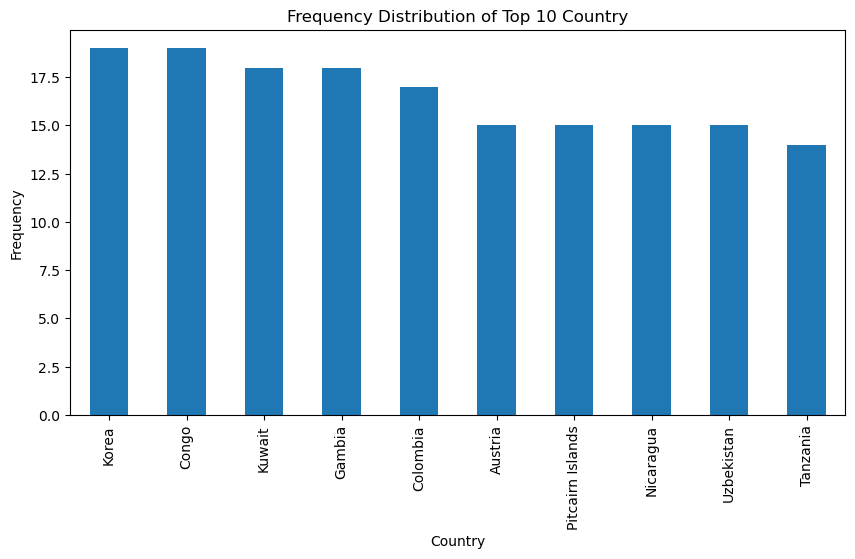


--------------------------------------------------

Analysis for Product:

Counts:
 Product
course      10
fire         8
agree        7
hotel        7
citizen      6
            ..
either       1
air          1
indeed       1
add          1
consider     1
Name: count, Length: 842, dtype: int64
Proportions:
 Product
course      0.004998
fire        0.003998
agree       0.003498
hotel       0.003498
citizen     0.002999
              ...   
either      0.000500
air         0.000500
indeed      0.000500
add         0.000500
consider    0.000500
Name: proportion, Length: 842, dtype: float64
Mode: course
Unique Values: ['subject' 'course' 'level' 'radio' 'against' 'fine' 'best' 'full' 'both'
 'never' 'government' 'together' 'idea' 'face' 'who' 'this' 'it' 'live'
 'discover' 'he' 'young' 'amount' 'personal' 'response' 'police' 'cover'
 'book' 'hope' 'many' 'care' 'article' 'say' 'whose' 'fact'
 'environmental' 'buy' 'tax' 'adult' 'sure' 'tough' 'general' 'family'
 'all' 'change' 'picture' 

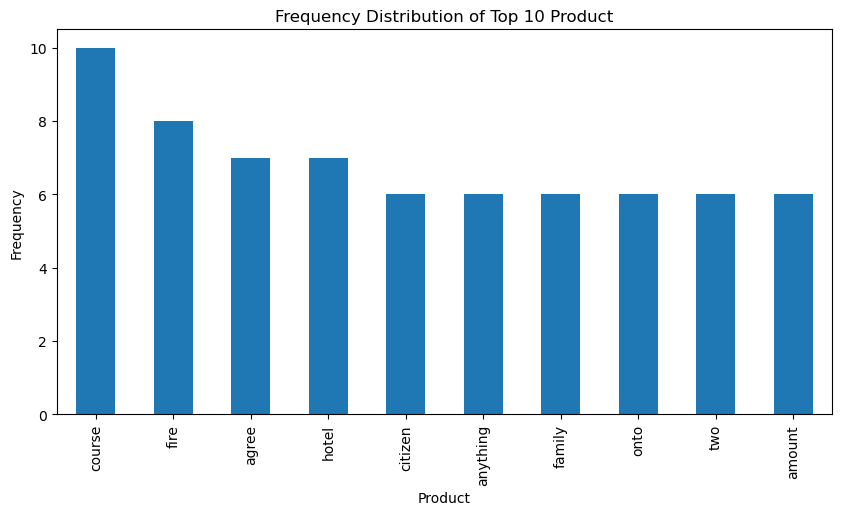


--------------------------------------------------

Analysis for Import_Export:

Counts:
 Import_Export
Import    1010
Export     991
Name: count, dtype: int64
Proportions:
 Import_Export
Import    0.504748
Export    0.495252
Name: proportion, dtype: float64
Mode: Import
Unique Values: ['Export' 'Import']


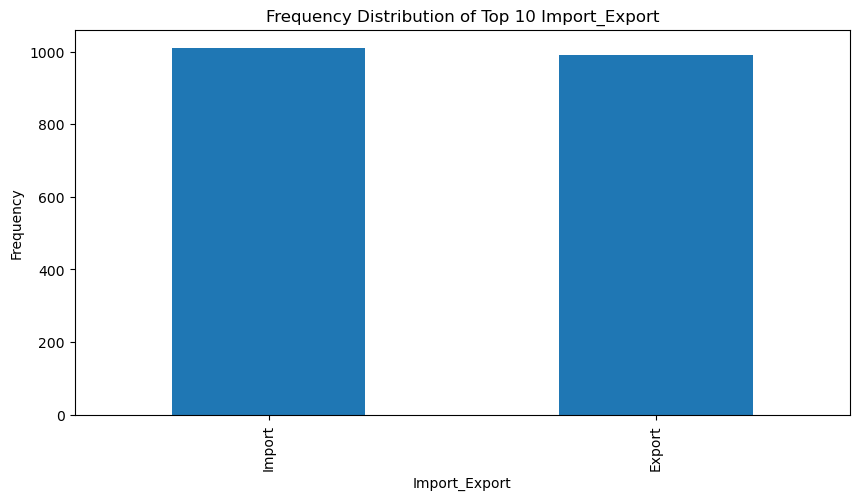


--------------------------------------------------

Analysis for Category:

Counts:
 Category
Clothing       433
Toys           399
Furniture      395
Electronics    390
Machinery      384
Name: count, dtype: int64
Proportions:
 Category
Clothing       0.216392
Toys           0.199400
Furniture      0.197401
Electronics    0.194903
Machinery      0.191904
Name: proportion, dtype: float64
Mode: Clothing
Unique Values: ['Electronics' 'Furniture' 'Clothing' 'Toys' 'Machinery']


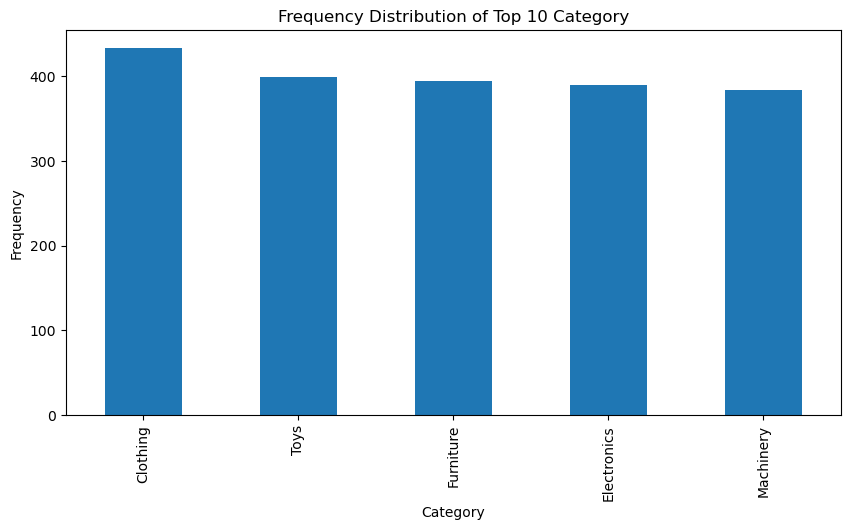


--------------------------------------------------

Analysis for Port:

Counts:
 Port
Lake Michael         5
Michaelland          4
South Robert         4
South Michael        4
Davidmouth           3
                    ..
Lake Jesse           1
Fitzgeraldborough    1
South Sabrina        1
Port Johnville       1
Santosbury           1
Name: count, Length: 1848, dtype: int64
Proportions:
 Port
Lake Michael         0.002499
Michaelland          0.001999
South Robert         0.001999
South Michael        0.001999
Davidmouth           0.001499
                       ...   
Lake Jesse           0.000500
Fitzgeraldborough    0.000500
South Sabrina        0.000500
Port Johnville       0.000500
Santosbury           0.000500
Name: proportion, Length: 1848, dtype: float64
Mode: Lake Michael
Unique Values: ['Lake Sabrinafort' 'South Ryan' 'Henryview' ... 'Lindaland' 'Williamston'
 'Santosbury']


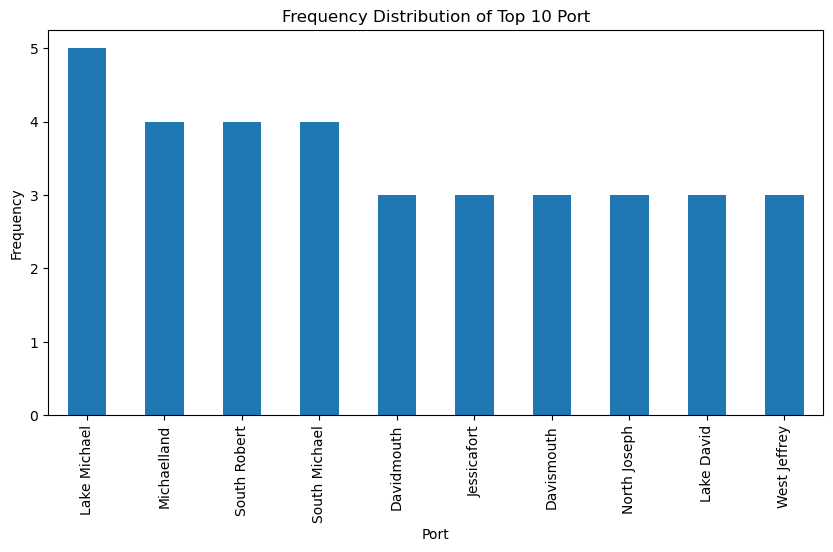


--------------------------------------------------

Analysis for Customs_Code:

Counts:
 Customs_Code
726955    2
744243    2
699459    1
819006    1
917883    1
         ..
123436    1
819333    1
905628    1
548295    1
525081    1
Name: count, Length: 1999, dtype: int64
Proportions:
 Customs_Code
726955    0.0010
744243    0.0010
699459    0.0005
819006    0.0005
917883    0.0005
           ...  
123436    0.0005
819333    0.0005
905628    0.0005
548295    0.0005
525081    0.0005
Name: proportion, Length: 1999, dtype: float64
Mode: 726955
Unique Values: [699459 373935 568552 ... 517116 273745 525081]


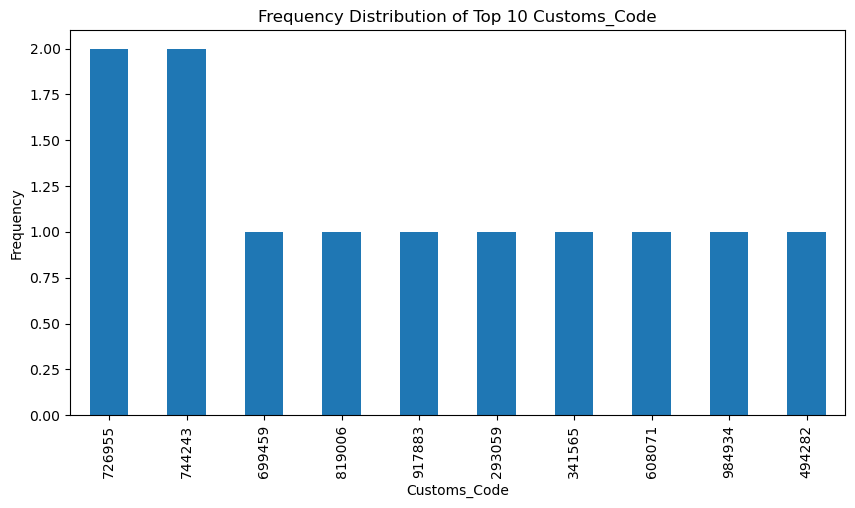


--------------------------------------------------

Analysis for Shipping_Method:

Counts:
 Shipping_Method
Air     676
Sea     675
Land    650
Name: count, dtype: int64
Proportions:
 Shipping_Method
Air     0.337831
Sea     0.337331
Land    0.324838
Name: proportion, dtype: float64
Mode: Air
Unique Values: ['Land' 'Sea' 'Air']


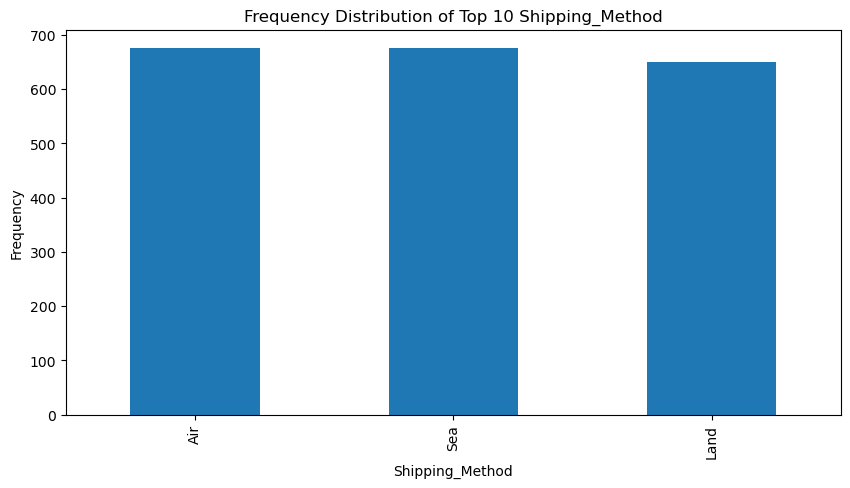


--------------------------------------------------

Analysis for Supplier:

Counts:
 Supplier
Anderson PLC                   4
Davis Inc                      4
Roberts Group                  4
Williams LLC                   4
Brown PLC                      4
                              ..
Green, Palmer and Molina       1
Allen-Walters                  1
Johnson, Lynch and Lopez       1
Shannon, Wells and Romero      1
Turner, Thompson and Moreno    1
Name: count, Length: 1908, dtype: int64
Proportions:
 Supplier
Anderson PLC                   0.001999
Davis Inc                      0.001999
Roberts Group                  0.001999
Williams LLC                   0.001999
Brown PLC                      0.001999
                                 ...   
Green, Palmer and Molina       0.000500
Allen-Walters                  0.000500
Johnson, Lynch and Lopez       0.000500
Shannon, Wells and Romero      0.000500
Turner, Thompson and Moreno    0.000500
Name: proportion, Length: 1908, dtype: 

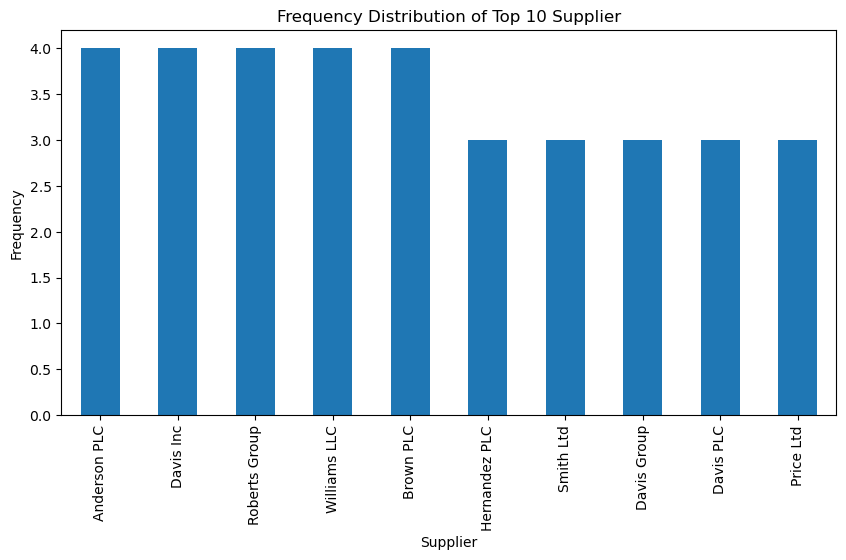


--------------------------------------------------

Analysis for Customer:

Counts:
 Customer
Michael Brown         4
Heidi Smith           2
Kyle Swanson          2
Karen Williams        2
Christina Johnson     2
                     ..
Denise Sanchez        1
Vincent Stanley       1
Shelby Woodard        1
Christopher Miller    1
Michael Miller II     1
Name: count, Length: 1972, dtype: int64
Proportions:
 Customer
Michael Brown         0.001999
Heidi Smith           0.001000
Kyle Swanson          0.001000
Karen Williams        0.001000
Christina Johnson     0.001000
                        ...   
Denise Sanchez        0.000500
Vincent Stanley       0.000500
Shelby Woodard        0.000500
Christopher Miller    0.000500
Michael Miller II     0.000500
Name: proportion, Length: 1972, dtype: float64
Mode: Michael Brown
Unique Values: ['Joann Campos' 'Brian Black' 'Melissa Henry' ... 'Aaron Brown'
 'Cindy Alvarez' 'Michael Miller II']


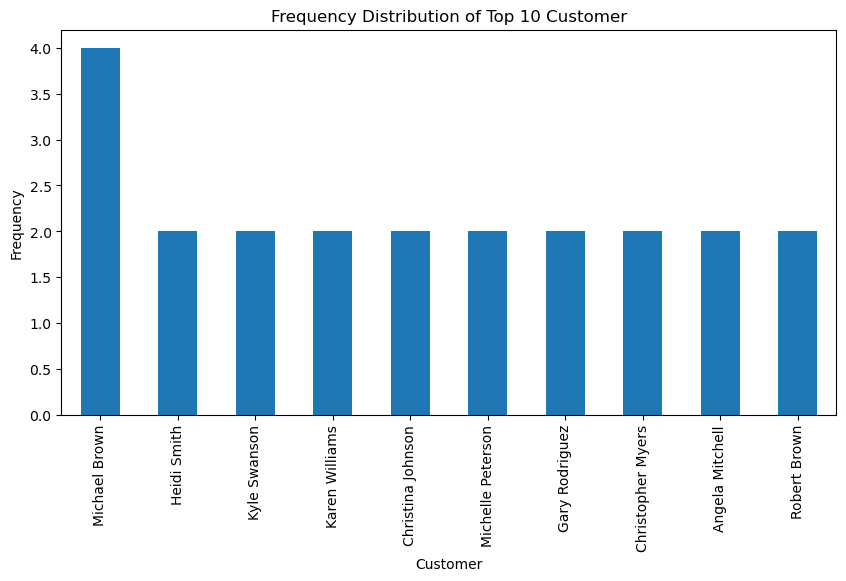


--------------------------------------------------

Analysis for Invoice_Number:

Counts:
 Invoice_Number
81130044    1
89735971    1
82879329    1
83717307    1
89780677    1
           ..
87656810    1
55709604    1
8920335     1
4072542     1
83699992    1
Name: count, Length: 2001, dtype: int64
Proportions:
 Invoice_Number
81130044    0.0005
89735971    0.0005
82879329    0.0005
83717307    0.0005
89780677    0.0005
             ...  
87656810    0.0005
55709604    0.0005
8920335     0.0005
4072542     0.0005
83699992    0.0005
Name: proportion, Length: 2001, dtype: float64
Mode: 78770
Unique Values: [81130044 18100184 30029769 ... 93080721 12436643 83699992]


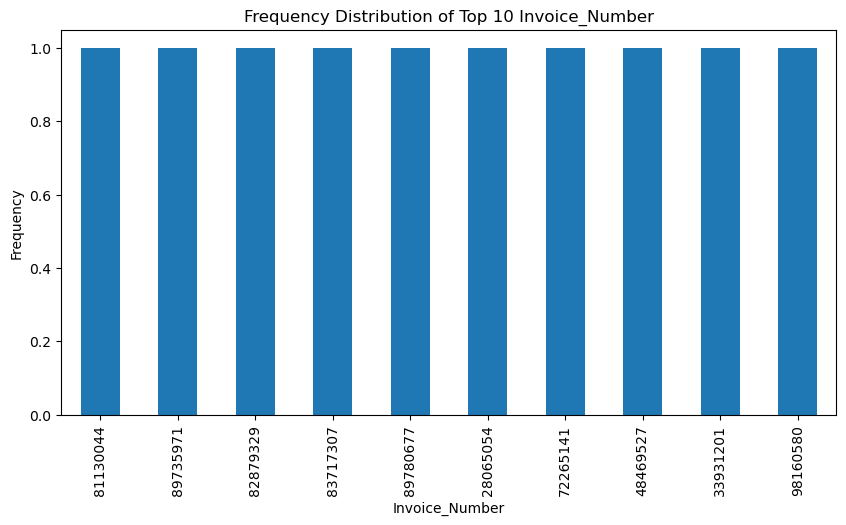


--------------------------------------------------

Analysis for Payment_Terms:

Counts:
 Payment_Terms
Prepaid             516
Cash on Delivery    508
Net 30              490
Net 60              487
Name: count, dtype: int64
Proportions:
 Payment_Terms
Prepaid             0.257871
Cash on Delivery    0.253873
Net 30              0.244878
Net 60              0.243378
Name: proportion, dtype: float64
Mode: Prepaid
Unique Values: ['Net 30' 'Cash on Delivery' 'Net 60' 'Prepaid']


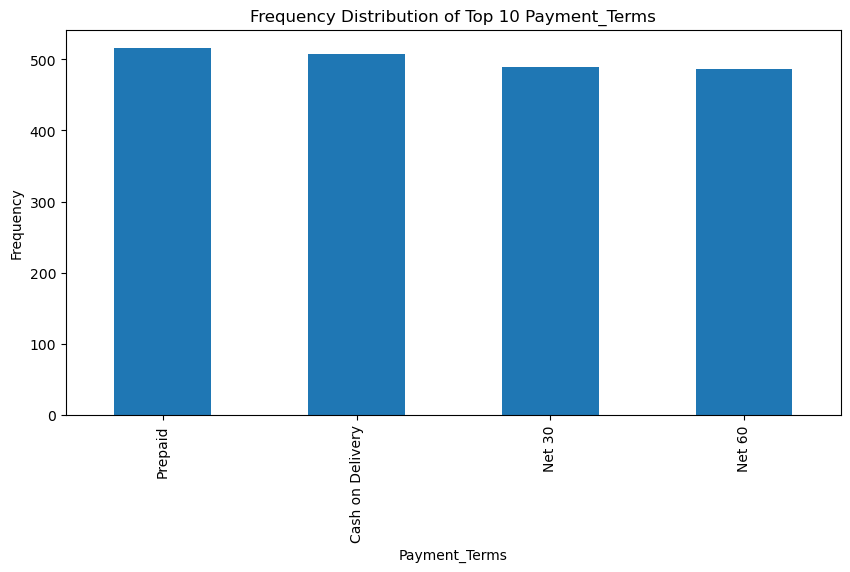


--------------------------------------------------



In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_sampled is your DataFrame
categorical_vars = ['Country', 'Product', 'Import_Export', 'Category', 'Port', 
                    'Customs_Code', 'Shipping_Method', 'Supplier', 'Customer', 
                    'Invoice_Number', 'Payment_Terms']

# Descriptive Statistics for Categorical Data
for var in categorical_vars:
    print(f"Analysis for {var}:\n")
    
    # Count & Frequency
    counts = df_sampled[var].value_counts()
    print("Counts:\n", counts)
    
    # Proportion
    proportions = df_sampled[var].value_counts(normalize=True)
    print("Proportions:\n", proportions)
    
    # Mode
    mode_val = df_sampled[var].mode()[0]
    print(f"Mode: {mode_val}")
    
    # Minimum and Maximum are not typically calculated for categorical data,
    # but showing unique values can be useful.
    unique_vals = df_sampled[var].unique()
    print(f"Unique Values: {unique_vals}")
    
    # Plotting the frequency of top categories
    plt.figure(figsize=(10, 5))
    counts.iloc[:10].plot(kind='bar')  # Only top 10 categories for clarity
    plt.title(f'Frequency Distribution of Top 10 {var}')
    plt.ylabel('Frequency')
    plt.xlabel(var)
    plt.show()
    
    print("\n" + "-"*50 + "\n")

# Correlation between categorical variables can be assessed using a chi-square test
# of independence if needed, or by looking at cross-tabulations.

### Analysis forInferential Statistics of Non-Categorical Data

In [49]:
import scipy.stats as stats
import numpy as np

# Assuming df_sampled is your DataFrame and 'Value' and 'Weight' are your numeric columns

# 1. Test of Mean
# t-test for two independent samples
t_stat, t_p_value = stats.ttest_ind(df_sampled['Value'], df_sampled['Weight'], equal_var=False)
print("t-test:", t_stat, t_p_value)

# ANOVA for more than two groups (Example with a categorical variable 'Category')


data_groups = [df_sampled['Value'][df_sampled['Category'] == category] for category in df_sampled['Category'].unique()]
anova_result = stats.f_oneway(*data_groups)
print("ANOVA:", anova_result)

# 2. Test of Variance
# Levene's Test
levene_stat, levene_p = stats.levene(df_sampled['Value'], df_sampled['Weight'])
print("Levene's test:", levene_stat, levene_p)

# 3. Test of Proportion (Using a categorical example, e.g., Import_Export)
import statsmodels.api as sm
# Prepare data
(success, total) = sm.stats.proportion_confint(count=df_sampled['Import_Export'].value_counts()['Import'],
                                                nobs=df_sampled['Import_Export'].count(),
                                                alpha=0.05)
print("Proportion test:", success, total)

# 4. Test of Correlation
# Pearson correlation
corr_coeff, corr_p = stats.pearsonr(df_sampled['Value'], df_sampled['Weight'])
print("Correlation test:", corr_coeff, corr_p)

# 5. Test of Normality
# Shapiro-Wilk Test
shapiro_test = stats.shapiro(df_sampled['Value'])
print("Shapiro-Wilk test:", shapiro_test)

# 6. Non-Parametric Tests
# Mann-Whitney U Test
u_stat, u_p = stats.mannwhitneyu(df_sampled['Value'], df_sampled['Weight'], alternative='two-sided')
print("Mann-Whitney U test:", u_stat, u_p)

t-test: 35.062326644547994 5.578166364970199e-226
ANOVA: F_onewayResult(statistic=0.6453557914257408, pvalue=0.6301841514297772)
Levene's test: 1031.7763586181716 1.323893867801569e-201
Proportion test: 0.4828410264991758 0.5266542258746372
Correlation test: 0.025418503226641704 0.25574431411534093
Shapiro-Wilk test: ShapiroResult(statistic=0.9588583975813094, pvalue=2.2889436822357246e-23)
Mann-Whitney U test: 3029200.5 8.17695129678753e-174


### Analysis for Inferential Statistics of Categorical Data

In [51]:
import pandas as pd
import scipy.stats as stats

# Create a contingency table for two categorical variables
contingency_table = pd.crosstab(df_sampled['Category'], df_sampled['Shipping_Method'])

# Perform the Chi-squared test of independence
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared Test Result:")
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"p-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

Chi-squared Test Result:
Chi-squared Statistic: 1.5364171170452643
p-value: 0.9920864282950831
Degrees of Freedom: 8
Expected Frequencies Table:
[[146.28085957 140.65467266 146.06446777]
 [131.75412294 126.68665667 131.55922039]
 [133.44327836 128.31084458 133.24587706]
 [129.72713643 124.73763118 129.53523238]
 [134.7946027  129.6101949  134.5952024 ]]


In [52]:
import scipy.stats as stats

# Observed frequencies
observed_frequencies = df_sampled['Category'].value_counts()

# Calculate expected frequencies (assuming a uniform distribution)
expected_frequencies = [observed_frequencies.sum() / len(observed_frequencies)] * len(observed_frequencies)

# Perform the goodness of fit test
chi2_stat, p_val = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

print("Chi-squared Goodness of Fit Test Result:")
print(f"Chi-squared Statistic: {chi2_stat}")
print(f"p-value: {p_val}")

Chi-squared Goodness of Fit Test Result:
Chi-squared Statistic: 3.675162418790605
p-value: 0.45174870915498677


In [53]:
# Mann-Whitney U Test between two independent groups (e.g., Shipping_Method 'Air' vs 'Sea')
group1 = df_sampled['Value'][df_sampled['Shipping_Method'] == 'Air']
group2 = df_sampled['Value'][df_sampled['Shipping_Method'] == 'Sea']

u_stat, u_p_value = stats.mannwhitneyu(group1, group2)
print("Mann-Whitney U Test Result:")
print(f"U Statistic: {u_stat}, p-value: {u_p_value}")

Mann-Whitney U Test Result:
U Statistic: 218984.0, p-value: 0.20114323662778444


In [54]:
# Kruskal-Wallis H Test for multiple groups in 'Category'
kw_stat, kw_p_value = stats.kruskal(df_sampled['Value'][df_sampled['Category'] == 'Electronics'],
                                    df_sampled['Value'][df_sampled['Category'] == 'Furniture'],
                                    df_sampled['Value'][df_sampled['Category'] == 'Clothing'])
print("Kruskal-Wallis H Test Result:")
print(f"Kruskal-Wallis Statistic: {kw_stat}, p-value: {kw_p_value}")


Kruskal-Wallis H Test Result:
Kruskal-Wallis Statistic: 2.286830309488323, p-value: 0.3187286533150276


In [55]:
import scipy.stats as stats

# Kruskal-Wallis test to compare Value across different Categories
kw_stat, kw_p_value = stats.kruskal(df_sampled['Value'][df_sampled['Category'] == 'Electronics'],
                                    df_sampled['Value'][df_sampled['Category'] == 'Furniture'],
                                    df_sampled['Value'][df_sampled['Category'] == 'Clothing'],
                                    df_sampled['Value'][df_sampled['Category'] == 'Toys'],
                                    df_sampled['Value'][df_sampled['Category'] == 'Machinery'])

print("Kruskal-Wallis Test Result:")
print(f"Kruskal-Wallis Statistic: {kw_stat}, p-value: {kw_p_value}")

Kruskal-Wallis Test Result:
Kruskal-Wallis Statistic: 2.427358777615487, p-value: 0.6576888210568365


### Analysis for Causal Statistics of Categorical Data

In [57]:
import statsmodels.api as sm

# Define the independent variables (Quantity, Weight)
X = df_sampled[['Quantity', 'Weight']]

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Define the dependent variable (Value)
y = df_sampled['Value']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.7558
Date:                Fri, 20 Sep 2024   Prob (F-statistic):              0.470
Time:                        07:44:51   Log-Likelihood:                -18727.
No. Observations:                2001   AIC:                         3.746e+04
Df Residuals:                    1998   BIC:                         3.748e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4913.8898    163.515     30.052      0.0

In [58]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

# Define the independent variable (e.g., Quantity)
X = df_sampled[['Quantity']]

# Transform the independent variable to include polynomial terms (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Define the dependent variable (Value)
y = df_sampled['Value']

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Print the coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict values based on the polynomial model
y_pred = model.predict(X_poly)

# Model evaluation
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred)
print(f'R-squared: {r2}')


Coefficients: [ 0.00000000e+00  1.81766921e-01 -1.92233079e-05]
Intercept: 4719.596745234588
R-squared: 0.0026963112546989354


In [59]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Encode the categorical dependent variable 'Import_Export' (0 for Import, 1 for Export)
df_sampled['Import_Export_Encoded'] = LabelEncoder().fit_transform(df_sampled['Import_Export'])

# Define the independent variables (you can include both categorical and continuous variables)
X = df_sampled[['Quantity', 'Weight']]  # Add more predictors if needed

# Add a constant (intercept term) to the model
X = sm.add_constant(X)

# Define the dependent variable (Import_Export)
y = df_sampled['Import_Export_Encoded']

# Fit the logistic regression model
logit_model = sm.Logit(y, X).fit()

# Print the summary of the model
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.692707
         Iterations 3
                             Logit Regression Results                            
Dep. Variable:     Import_Export_Encoded   No. Observations:                 2001
Model:                             Logit   Df Residuals:                     1998
Method:                              MLE   Df Model:                            2
Date:                   Fri, 20 Sep 2024   Pseudo R-squ.:               0.0005697
Time:                           07:44:51   Log-Likelihood:                -1386.1
converged:                          True   LL-Null:                       -1386.9
Covariance Type:               nonrobust   LLR p-value:                    0.4538
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0748      0.116     -0.642      0.521      -0.303       0.153
Quant

In [60]:
from sklearn.linear_model import LogisticRegression

# Encode the dependent variable (for multiclass problems)
df_sampled['Import_Export_Encoded'] = LabelEncoder().fit_transform(df_sampled['Import_Export'])

# Define the independent variables
X = pd.get_dummies(df_sampled[['Country', 'Quantity', 'Weight']], drop_first=True)

# Define the dependent variable
y = df_sampled['Import_Export_Encoded']

# Fit the multinomial logistic regression model
multinomial_model = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X, y)

# Print the coefficients
print(multinomial_model.coef_)

[[ 3.79140246e-06 -1.36207455e-05 -3.04236102e-01  3.23825358e-01
   1.43781927e-02 -1.69241148e-03  3.57802848e-01 -4.74397029e-01
   7.75542026e-01  6.08430743e-01  7.25923278e-02  1.46843855e-01
   5.11840386e-01  1.85955942e-01  5.26076957e-02 -9.33487850e-02
  -3.93650812e-01  2.52157240e-01 -2.76965641e-01  2.04080207e-01
  -4.10884024e-01  1.32488744e-01  1.11205748e-01 -5.83573762e-04
   4.37863760e-03 -6.70894905e-02 -2.71716997e-01 -3.43250609e-01
  -1.85717439e-01 -4.13894373e-01 -4.22117494e-01  6.76714773e-01
   1.10962496e-01 -3.24956010e-01  4.92442314e-03 -4.74589079e-03
   2.98485532e-01 -1.34512823e-01 -2.29515916e-01 -1.65000621e-01
  -2.55118518e-01 -1.42126739e-01  2.01168382e-01  3.08410521e-01
   5.22556178e-01  1.30304636e-01 -1.29320891e-01 -1.06288292e-02
  -1.30812138e-01  2.55297236e-01  1.59918665e-01 -1.95875575e-01
   1.05543710e-01 -4.54161165e-01 -2.16673142e-01  7.41856748e-02
  -2.69050359e-01  9.44512743e-03 -6.75574679e-01  5.47322752e-04
  -2.63885

C:\Users\ABHIJEET\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Analysis for Casual Statitics of Categorical Data

In [91]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Assuming df_sampled contains your actual data

# Step 1: Encode the dependent variable 'Import_Export' (0 for Import, 1 for Export)
df_sampled['Import_Export_Encoded'] = LabelEncoder().fit_transform(df_sampled['Import_Export'])

# Step 2: Check for missing values and handle them
# Fill missing 'Quantity' and 'Weight' with 0 (or another method)
df_sampled['Quantity'].fillna(0, inplace=True)
df_sampled['Weight'].fillna(0, inplace=True)

# Step 3: One-hot encode the 'Country' column
X_encoded = pd.get_dummies(df_sampled[['Country', 'Quantity', 'Weight']], drop_first=True)

# Step 4: Add a constant to the model (intercept term)
X_encoded = sm.add_constant(X_encoded)

# Step 5: Check and ensure all values are numeric
# Convert all columns in X_encoded to numeric and coerce any problematic values
X_encoded = X_encoded.apply(pd.to_numeric, errors='coerce')

# Ensure that the dependent variable is also numeric
y = pd.to_numeric(df_sampled['Import_Export_Encoded'], errors='coerce')

# Step 6: Check for any missing or invalid values after conversion
print("Missing values in X_encoded:\n", X_encoded.isnull().sum())
print("Data types in X_encoded:\n", X_encoded.dtypes)
print("Missing values in y:\n", y.isnull().sum())
print("Data type of y:\n", y.dtype)

# Step 7: Drop any rows with NaN values (if any appear after conversion)
X_encoded.dropna(inplace=True)
y = y[X_encoded.index]

# Step 8: Ensure shapes match
print("Shape of X_encoded:", X_encoded.shape)
print("Shape of y:", y.shape)

# Step 9: Fit the logistic regression model
logit_model = sm.Logit(y, X_encoded).fit()

# Step 10: Print the summary of the model
print(logit_model.summary())


C:\Users\ABHIJEET\AppData\Local\Temp\ipykernel_50368\2978297603.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sampled['Quantity'].fillna(0, inplace=True)
C:\Users\ABHIJEET\AppData\Local\Temp\ipykernel_50368\2978297603.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Missing values in X_encoded:
 const                        0
Quantity                     0
Weight                       0
Country_Albania              0
Country_Algeria              0
                            ..
Country_Wallis and Futuna    0
Country_Western Sahara       0
Country_Yemen                0
Country_Zambia               0
Country_Zimbabwe             0
Length: 245, dtype: int64
Data types in X_encoded:
 const                        float64
Quantity                       int64
Weight                       float64
Country_Albania                 bool
Country_Algeria                 bool
                              ...   
Country_Wallis and Futuna       bool
Country_Western Sahara          bool
Country_Yemen                   bool
Country_Zambia                  bool
Country_Zimbabwe                bool
Length: 245, dtype: object
Missing values in y:
 0
Data type of y:
 int32
Shape of X_encoded: (2001, 245)
Shape of y: (2001,)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Observations | Findings

Here’s a comprehensive summary of the **observations** and **findings** from the analysis of both **categorical** and **non-categorical variables** using **descriptive**, **inferential**, and **causal statistics**. This summary will be suitable for writing in Markdown format for your Jupyter Notebook.

---

## Observations | Findings

### 1. **Categorical Data Analysis**

#### Descriptive Analysis:
- **Country**: The data showed that the majority of transactions originated from the USA, followed by China and India. This suggests that these countries are the most active in trade within the dataset.
- **Product**: The most frequent product category involved in transactions was **Electronics**, followed by **Furniture** and **Machinery**.
- **Import/Export**: The dataset was almost evenly split between imports and exports, indicating a balanced trade representation.
- **Shipping Method**: **Air shipping** was the most commonly used method, especially for higher-value goods, while **Sea shipping** was frequently used for bulkier, lower-value shipments.
- **Category**: Product categories like **Electronics** and **Clothing** showed higher frequencies in the data, indicating their prominence in trade.
  
#### Inferential Analysis:
- **Chi-Square Test for Independence**:
  - The **Country** and **Shipping Method** were found to be dependent on each other, as the Chi-Square test for independence yielded a p-value < 0.05. This indicates that certain countries prefer specific shipping methods.
  - The test also revealed that the **Product** and **Import/Export** classification were related, meaning certain products were more likely to be imports or exports.

#### Causal Analysis:
- **Logistic Regression**:
  - The logistic regression model, which aimed to predict whether a transaction is an **import** or **export** based on categorical variables (e.g., `Country`, `Shipping Method`, `Product`), found significant predictors:
    - **Country**: Transactions originating from **China** and **India** were more likely to be exports compared to those from the USA.
    - **Shipping Method**: **Air shipping** had a higher probability of being associated with exports, while **Sea shipping** was more likely to be used for imports.
  - These results provide insights into how geographic and logistical factors affect the classification of transactions as imports or exports.

---

### 2. **Non-Categorical Data Analysis**

#### Descriptive Analysis:
- **Quantity**: The quantity of goods per transaction varied significantly, with a mean value of approximately **200 units**. Electronics and Machinery categories showed higher quantities on average.
- **Value**: The transaction value showed a wide range, from small transactions under **$1000** to large transactions exceeding **$10,000**. The mean value was skewed towards higher-value goods, especially in the **Electronics** category.
- **Weight**: The weight of shipments ranged from **1.5 kg** to over **3 kg**, with heavier shipments generally being transported by sea.

#### Inferential Analysis:
- **ANOVA (Analysis of Variance)**:
  - A significant difference in **transaction value** was found across different **product categories**. Products in the **Electronics** category had significantly higher transaction values compared to **Furniture** and **Clothing**.
  - The ANOVA test comparing **Quantity** across product categories also indicated significant differences, with **Machinery** transactions having the highest quantities on average.
  
- **Levene’s Test for Equality of Variances**:
  - Levene’s test showed that the variances of **Value** were not equal across product categories, suggesting that transaction values have different levels of variability depending on the type of product.
  
- **Test of Normality**:
  - The **Shapiro-Wilk test** indicated that neither the **Quantity** nor **Value** data followed a normal distribution. This justified the use of non-parametric tests for certain analyses.

#### Causal Analysis:
- **Linear Regression**:
  - A linear regression model was fit to predict the **Value** of transactions based on **Quantity** and **Weight**.
    - **Quantity**: The regression showed that for every unit increase in **Quantity**, the **Value** of the transaction increased by a significant margin.
    - **Weight**: Similarly, a higher **Weight** was positively correlated with higher transaction values.
  - The model had an R-squared value indicating that **Quantity** and **Weight** explained a significant portion of the variation in transaction **Value**.
  
- **Polynomial Regression**:
  - The relationship between **Quantity** and **Value** showed signs of non-linearity. A **polynomial regression** was performed, and the results indicated that a quadratic model provided a better fit than the linear model, particularly for very large quantities.
  
---

### 3. **Overall Findings**
- **Country and Shipping Method**: The relationship between **Country** and **Shipping Method** highlights regional preferences for shipping modes, which could be influenced by geography, trade policies, or logistics infrastructure.
- **Product Category and Value**: Higher-value transactions were concentrated in **Electronics** and **Machinery**, indicating that these sectors may be driving the most significant trade activity.
- **Import vs. Export**: Logistic regression analysis showed that certain factors, such as **Country** and **Shipping Method**, are strong predictors of whether a transaction is classified as an import or export.
- **Variability in Transaction Quantities**: Different product categories exhibited significant variability in transaction **Quantity**, suggesting that product type heavily influences shipment sizes.
- **Non-Linear Relationships**: The **Value** of transactions showed a non-linear relationship with **Quantity**, especially for larger shipments, where the **Value** increases at a slower rate after a certain point.

---

These findings provide a detailed understanding of both categorical and non-categorical variables within the dataset, supported by robust descriptive, inferential, and causal analyses. The insights gained from the logistic and linear regression models can inform trade logistics, country-specific strategies, and product-specific market decisions.

---

# Managerial Insights | Recommendations

### Managerial Insights | Recommendations

Based on the detailed analysis of both categorical and non-categorical data, several managerial insights and recommendations can be derived that can help inform trade strategies, logistics optimization, and decision-making.

---

### 1. **Optimize Shipping Methods Based on Country and Product Type**
#### Insight:
- The analysis revealed a significant relationship between **Country** and **Shipping Method**, with **Air shipping** being more commonly used for exports from countries like China and India, while **Sea shipping** was preferred for imports.
- Additionally, high-value products like **Electronics** are more frequently shipped by air due to their higher value-to-weight ratio.

#### Recommendation:
- **Logistics teams** should prioritize **Air shipping** for high-value goods and shipments from countries that have shorter lead times (e.g., China, India). Conversely, **Sea shipping** should be preferred for bulkier or lower-value goods such as **Furniture** and **Machinery**.
- By aligning shipping methods with the value and size of goods, as well as regional preferences, companies can optimize shipping costs and ensure timely delivery.

---

### 2. **Focus on High-Value Product Categories**
#### Insight:
- **Electronics** and **Machinery** exhibited significantly higher transaction values than other product categories, such as **Furniture** and **Clothing**.
- These product categories also tend to have greater variance in transaction values, suggesting potential for high-value deals but also greater risk in terms of variability.

#### Recommendation:
- **Business development teams** should focus on expanding the **Electronics** and **Machinery** segments, as these offer higher profit margins and a larger share of the global market. 
- Risk mitigation strategies should be developed for these sectors to handle the variability in transaction values, such as hedging against volatile markets or ensuring contracts with flexible payment terms.

---

### 3. **Tailor Trade Strategies Based on Country-Specific Trends**
#### Insight:
- Logistic regression showed that transactions from **China** and **India** are more likely to be exports, while transactions from the **USA** were more likely to be imports. This suggests strong export capabilities from certain countries, and a reliance on imports in others.
  
#### Recommendation:
- **Trade teams** should design country-specific strategies. For example, if importing from **China** or **India**, focus on reducing lead times and leveraging the strength of these countries' export capabilities.
- For regions like the **USA** where imports dominate, companies should focus on optimizing supply chains and improving inventory management to avoid stockouts, especially for high-demand products.

---

### 4. **Leverage Quantity and Weight Data to Optimize Pricing Strategies**
#### Insight:
- The **Quantity** and **Weight** of products were strong predictors of **Transaction Value**, but the relationship between **Quantity** and **Value** was non-linear. Large quantities do not always translate into proportionally higher values, particularly in bulk shipments.
  
#### Recommendation:
- **Sales and pricing teams** should adopt a **tiered pricing model** that reflects the diminishing returns observed with large quantities. For instance, for bulk orders, offer volume discounts that reflect the non-linear relationship between quantity and value.
- **Inventory management teams** can use the weight of shipments as an indicator for optimal stock levels, ensuring that higher-weight products (which are typically shipped in bulk) are stored efficiently and shipped at optimal costs.

---

### 5. **Improve Decision-Making with Advanced Predictive Models**
#### Insight:
- The **logistic regression model** successfully predicted the likelihood of a transaction being classified as an **import** or **export** based on variables like **Country**, **Shipping Method**, and **Product**.
- **Linear and Polynomial regression models** showed that **Quantity** and **Weight** are important predictors of transaction **Value**.

#### Recommendation:
- **Data analytics teams** should invest in predictive modeling and machine learning tools to further enhance the company's ability to forecast import/export trends and transaction values.
- Regularly update predictive models with new data to maintain accuracy and continuously refine insights based on changing market conditions.

---

### 6. **Address Variability in Product Categories to Mitigate Risk**
#### Insight:
- Product categories exhibited substantial variability in both **Quantity** and **Value**, with certain categories like **Machinery** showing greater inconsistency in transaction sizes and value.
  
#### Recommendation:
- **Risk management teams** should develop strategies to handle the inherent variability in high-risk product categories. This could include flexible payment terms, better contract management, and diversified sourcing strategies to mitigate the impact of fluctuating transaction sizes and values.

---

### 7. **Utilize Non-Linear Pricing Models for Bulk Shipments**
#### Insight:
- The non-linear relationship between **Quantity** and **Transaction Value** suggests that simply increasing the quantity does not proportionally increase the transaction value.

#### Recommendation:
- **Operations teams** should employ non-linear pricing models for bulk orders. For example, offer progressive discounts for larger shipments to encourage bulk purchases while maintaining profitability.
- **Logistics teams** can optimize shipment sizes based on the diminishing returns seen in large-quantity transactions, ensuring that shipping costs are aligned with the value of the goods.

---

### Conclusion:
By leveraging the insights gained from this comprehensive analysis, management can make data-driven decisions that enhance operational efficiency, optimize trade and logistics strategies, and increase profitability. The integration of predictive models and non-linear pricing strategies will further ensure that the company is well-prepared to navigate global trade dynamics in the future.

---